In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
file_path = 'cleaned_engineered_data.csv'  # Set path to your CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,SalePrice,OverallQual,TotalSF,YearBuilt,GarageCars,Nbr_CollgCr,Nbr_Crawfor,Nbr_Mitchel,Nbr_NoRidge,Nbr_Veenker,Age,TotalSF_log
0,105000.0,6,2892,1976,1,False,True,False,False,False,49,2892
1,172000.0,1,3891,1952,3,False,False,False,False,True,73,3891
2,189900.0,4,3465,2008,3,True,False,False,False,False,17,3465
3,195500.0,4,3064,2008,1,False,False,True,False,False,17,3064
4,191500.0,8,2963,1972,0,False,False,True,False,False,53,2963


In [5]:
# Basic data info and check for missing values
print(df.info())
print('\nMissing values in each column:')
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1459 non-null   float64
 1   OverallQual  1459 non-null   int64  
 2   TotalSF      1459 non-null   int64  
 3   YearBuilt    1459 non-null   int64  
 4   GarageCars   1459 non-null   int64  
 5   Nbr_CollgCr  1459 non-null   bool   
 6   Nbr_Crawfor  1459 non-null   bool   
 7   Nbr_Mitchel  1459 non-null   bool   
 8   Nbr_NoRidge  1459 non-null   bool   
 9   Nbr_Veenker  1459 non-null   bool   
 10  Age          1459 non-null   int64  
 11  TotalSF_log  1459 non-null   int64  
dtypes: bool(5), float64(1), int64(6)
memory usage: 87.0 KB
None

Missing values in each column:
SalePrice      0
OverallQual    0
TotalSF        0
YearBuilt      0
GarageCars     0
Nbr_CollgCr    0
Nbr_Crawfor    0
Nbr_Mitchel    0
Nbr_NoRidge    0
Nbr_Veenker    0
Age            0
TotalSF_log    0
dtyp

In [6]:
# Define features and target variable
target = 'SalePrice'
features = df.columns.drop(target)

X = df[features]
y = df[target]


In [7]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f'Train set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')


Train set shape: (1167, 11)
Test set shape: (292, 11)


In [8]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:

# Predict on test set
predictions = model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 85423.52983279871


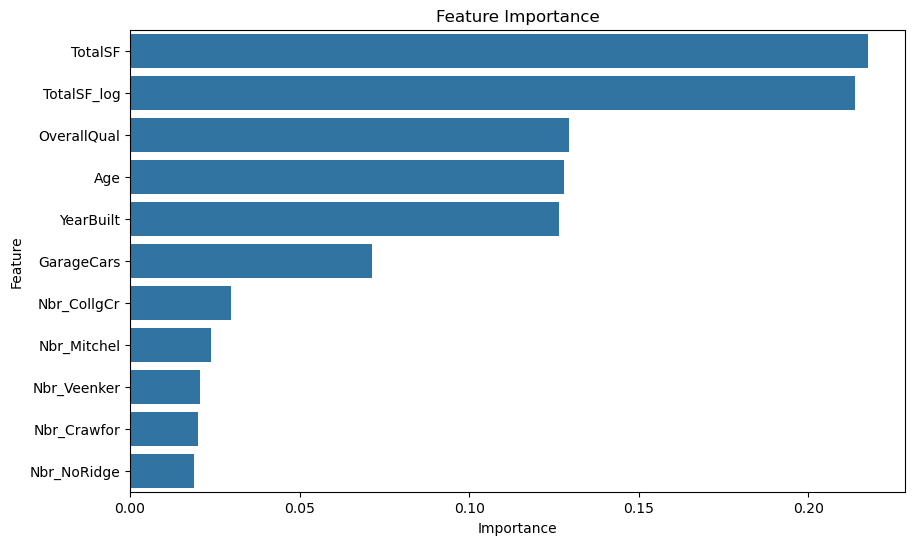

In [10]:
# Visualize Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
